In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Feature Engineering

In [7]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [9]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [11]:
df = df.rename(columns = {'yes':'Smoker'})

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [13]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Exploratory Analysis

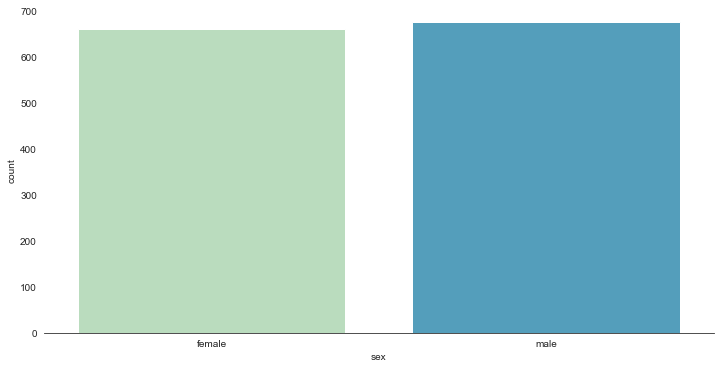

In [14]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

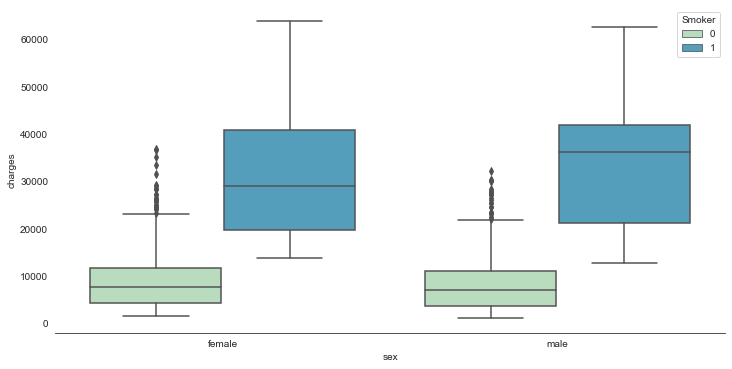

In [15]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<AxesSubplot:xlabel='age', ylabel='charges'>

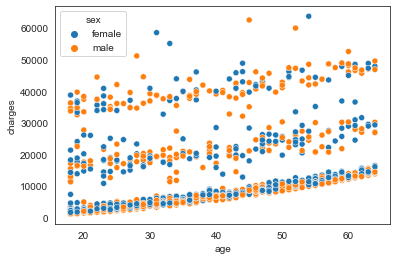

In [16]:

sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<AxesSubplot:xlabel='age', ylabel='charges'>

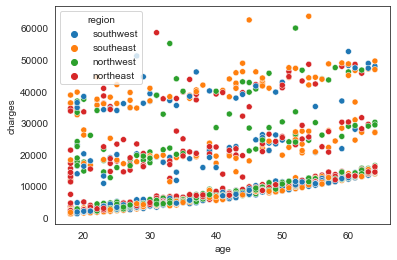

In [17]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

<AxesSubplot:xlabel='age', ylabel='charges'>

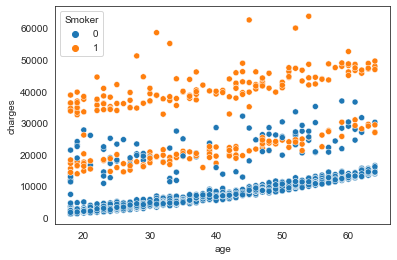

In [18]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

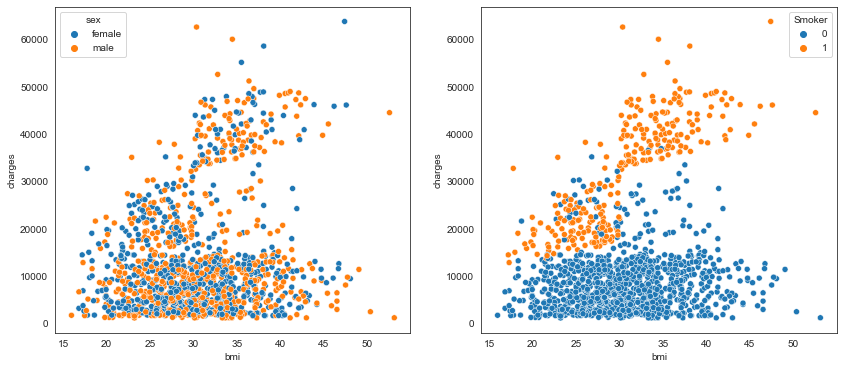

In [19]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

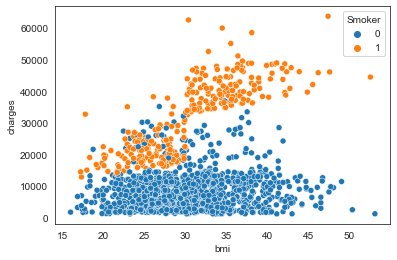

In [20]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker')

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [23]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

<AxesSubplot:>

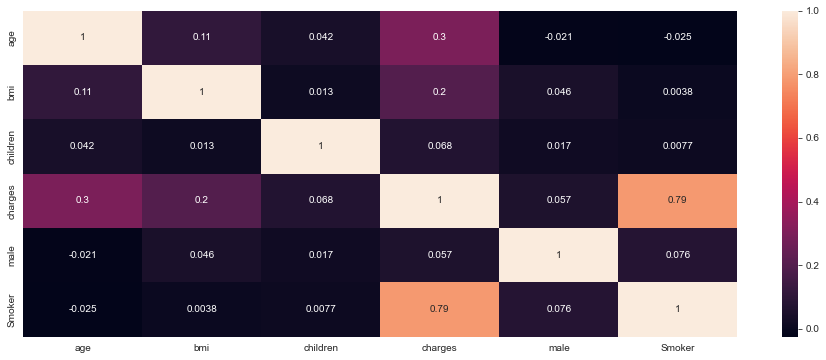

In [24]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

# Splitting the data

In [25]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [27]:
x_train.shape

(802, 5)

In [28]:
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [31]:
scaled_x_train

array([[ 1.46530947, -0.80611099, -0.91084444, -1.01761142, -0.5186399 ],
       [-1.13640106, -0.89738081, -0.91084444, -1.01761142, -0.5186399 ],
       [ 0.38126341, -1.68518353,  1.61682768,  0.98269338, -0.5186399 ],
       ...,
       [-0.63051291, -0.51708987,  0.77427031,  0.98269338, -0.5186399 ],
       [-0.77505238, -0.46985373, -0.91084444,  0.98269338, -0.5186399 ],
       [ 0.67034236, -1.53306715, -0.06828707, -1.01761142, -0.5186399 ]])

# Support vector regression

In [32]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [33]:
predict

array([9379.46170711, 9416.25647037, 9488.95335417, 9528.16389402,
       9431.05848986, 9402.31375762, 9502.84864768, 9478.44452933,
       9461.34595794, 9449.05773734, 9461.92429745, 9448.98901319,
       9504.88610575, 9389.22181703, 9504.04044386, 9472.82667838,
       9379.20682144, 9487.29599622, 9507.95716839, 9419.58491807,
       9508.29026949, 9398.17130507, 9394.48586586, 9502.21867048,
       9440.38920032, 9392.84040118, 9473.67986526, 9502.99645724,
       9483.77654801, 9531.84559906, 9476.70848783, 9495.61679609,
       9524.93181386, 9420.44607962, 9466.97530242, 9516.86192502,
       9418.51758901, 9489.59025119, 9505.92704405, 9425.88863496,
       9380.85001989, 9387.75816624, 9533.9878926 , 9499.17212993,
       9490.19215087, 9495.57308552, 9512.83791373, 9487.84369471,
       9493.85786874, 9388.6604491 , 9389.80612391, 9515.32216844,
       9447.22265841, 9435.89154253, 9394.2270007 , 9431.89059037,
       9517.38586457, 9401.12593664, 9400.77226081, 9538.62616

In [34]:
y_test

548      3213.62205
176      6455.86265
87      11073.17600
1062    48970.24760
873      6849.02600
           ...     
1123    18903.49141
714      2457.50200
464      1632.03625
287     14256.19280
416      9140.95100
Name: charges, Length: 536, dtype: float64

In [35]:
np.mean((y_test - predict)**2)

155800360.6461954

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predict')

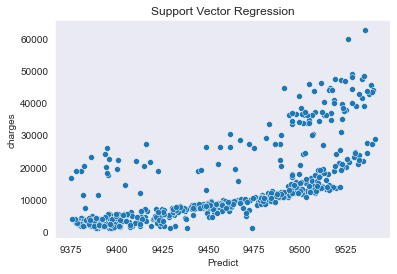

In [36]:

sns.set_style('dark')
f = sns.scatterplot(predict,y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')